# Homework 2


## References

+ Lectures 3-6 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [1]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, "savefig.dpi":300})
sns.set_context("notebook")
sns.set_style("ticks")

import scipy
import scipy.stats as st
import urllib.request
import os

from matplotlib import rc
rc('text', usetex=True)

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.
    
    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified 
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

## Student details

+ **First Name:** Jack
+ **Last Name:** Girard
+ **Email:** girard2@purdue.edu

## Problem 1 - Failure of a mechanical component

Assume that you designing a gear for a mechanical system.
Under normal operating conditions the gear is expected to fail at a random time.
Let $T$ be a random variable capturing the time the gear fails.
What should the probability density of $T$ look like?

Here are some hypothetical data to work with.
Suppose that we took ten gears and we worked them until failure.
The failure times (say in years) are as follows:

In [2]:
time_to_fail_data = np.array(
    [
        10.5,
        7.5,
        8.1,
        8.4,
        11.2,
        9.3,
        8.9,
        12.4
    ]
)

Why does each gear fail at different times?
There are several sources of uncertainty.
The most important are:

- Manufacturing imperfections.
- Different loading conditions.

If this was a controlled fatigue experiment, then we could eliminate the second source of uncertainty by using exactly the same loading conditions.

Now, we are going to fit a probability density function to these data.
Which one should we use?
Well, new gears do not fail easily.
So, the probability density function of $T$ should be close to zero for small $T$.
As time goes by, the probability density should increase because various things start happening to the material, e.g., crack formation, fatigue, etc. 
Finally, the probability density must again start going to zero as time further increases because nothing lasts forever...
A probability distribution that is commonly used to model this situation is the [Weibull](https://en.wikipedia.org/wiki/Weibull_distribution).
We are going to fit some fail time data to a Weibull distribution and then you will have to answer a few questions about failing times.

The Weibull has parameters and we are going to fit them to the available data.
The method we are going to use is called the *maximum likelihood method*.
We haven't really talked about this, and it is not important to know what it is to do this homework problem.
We will learn about maximum likelihood in later lectures.
Here is how we fit the parameters using `scipy.stats`:

In [3]:
fitted_params = st.exponweib.fit(time_to_fail_data, loc=0)
T = st.exponweib(*fitted_params)
rounded_fps = np.asarray(fitted_params)
# displaying fitted parameters in a neat format
np.set_printoptions(precision=5, suppress=True)
print(f"Fitted parameters: {rounded_fps}")

Fitted parameters: [448.06697   0.70997   3.42188   0.41628]


Let's plot the fitted Weibul PDF and the data we used:

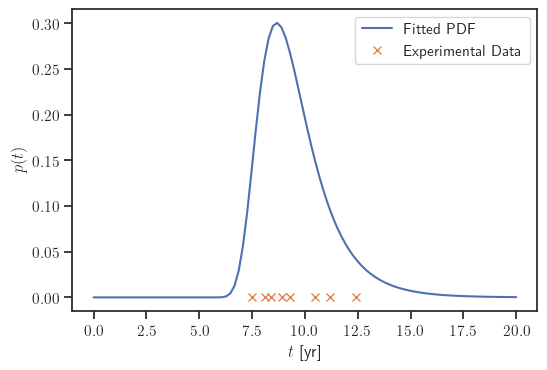

In [4]:
fig, ax = plt.subplots()
ts = np.linspace(0.0, 20.0, 100)
ax.plot(
    ts,
    T.pdf(ts),
    label="Fitted PDF"
)
ax.plot(
    time_to_fail_data,
    np.zeros_like(time_to_fail_data),
    "x",
    label="Experimental Data"
)
ax.set_xlabel(r"$t$ [yr]")
ax.set_ylabel(r"$p(t)$")
plt.legend(loc="best");

Now you have to answer a series of questions about the random variable $T$ that we just fitted.

A. Find the mean fail time and its variance.
Hint: Do not integrate anything by hand. Just use the functionality of ``scipy.stats``.

In [5]:
t_mean = T.expect()
t_var = T.var()
print(f"E[T] = {t_mean:.2f}")
print(f"V[T] = {t_var:.2f}")

E[T] = 9.53
V[T] = 2.88


B. Plot the cumulative distribution function $F(t) = p(T\le t)$ of $T$.

Text(0.5, 1.0, 'Cumulative Distribution Function of T')

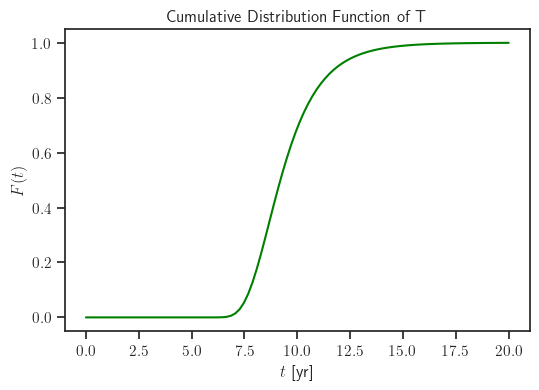

In [6]:
fig, ax = plt.subplots()
ax.plot(
    ts,
    T.cdf(ts),
    color='green'
)
ax.set_xlabel(r"$t$ [yr]")
ax.set_ylabel(r"$F(t)$")
ax.set_title("Cumulative Distribution Function of T")

C. Plot the probability that gear survives for more than $t$ as a function of $t$.
That is, plot the function:

$$
S(t) = p(T > t).
$$

Hint: First connect $S(t)$ to the cumulative distribution function $F(t)$ of $T$.

Let $A = T \le t$, therefore $\overline{A} = T > t$

Using the obvious rule and adjusting for new notation:

$$
p(A) + p(\overline{A}) = 1
$$

$$
S(t) = p(T > t) = 1 - p(T\le t) = 1 - F(t)
$$

Text(0.5, 1.0, 'Probability that Gear Survives More Than t Years')

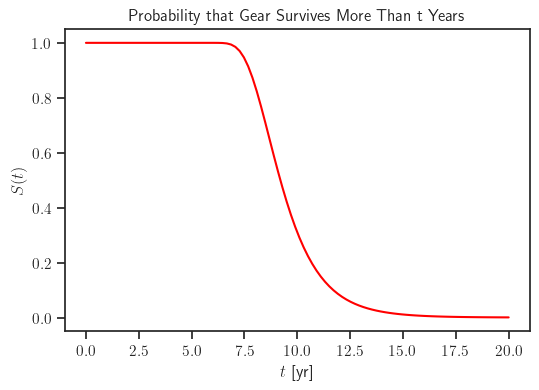

In [7]:
fig, ax = plt.subplots()
ax.plot(
    ts,
    1 - T.cdf(ts),
    color='red'
)
ax.set_xlabel(r"$t$ [yr]")
ax.set_ylabel(r"$S(t)$")
ax.set_title("Probability that Gear Survives More Than t Years")

D. Find the probability that the gear lasts anywhere between 8 and 10 years.

$$
p(t_{1} \leq T \leq t_{2}) = F_{T}(t_{2}) - F_{T}(t_{1})
$$

In [8]:
p_lastBetween8And10Yrs = T.cdf(10) - T.cdf(8)
print(f"p(8 <= T <= 10) = {p_lastBetween8And10Yrs:.4f}")

p(8 <= T <= 10) = 0.5343


E. If you were to sell the gear, how many years "warranty" would you offer?
<br>
Hint: This is subjective. There are many correct answers.
But as a manufacturer of the gear, you really do not want to be replacing any...
**Answer:**

As a gear manufacturer, replacing a large number of gears is not economically desirable. Based on multiple factors including the current business model in place, acceptable financial risk levels, desire for customer satisfaction, the status of the current economy, and the status of the raw material supply chain, I may select a warranty (in years) that falls somewhere between the 0.0001% and 10% quantiles.

The 0.0001% quantile corresponds to a rate of failure of 1 in 1,000,000: $((1 \div 1,000,000) \times 100) = 0.0001\%$. This value is close to the 6-Sigma target value of 3.4 defects per million opportunities (DPMO) [1]. The 10% quantile corresponds to the B10 life, which refers to the point at which 10% of units in a population will fail. The B10 life is a common metric used in the production of mechanical parts that undergo cyclic loading [2]. To be more fiscally conservative, I would select a warranty closer to the 0.0001% quantile mark. To prioritize customer satisfaction and good public image, I may want to select a warranty closer to the 10% quantile mark.

In special circumstances, the customer (based on characteristics like loyalty history and order quantity) would qualify to negotiate the warranty. This may be particularly beneficial to include in the policy if a more fiscally conservative warranty is selected.

Given the circumstances and the fact that there are many unknowns about the overall situation of this problem, I would select a final warranty that corresponds to the $\bf{0.01\%}$ quantile, which is $\bf{6.25}$ $\bf{years}$. A 6.25 year warranty corresponds to an average gear replacement of 1 in 10,000, given that the manufacturing process is assumed to remain constant. This is a fair middle ground value that keeps risk for the gear manufacturer low and also allows for proper gear replacement if a severely unexpected gear failure does indeed occur.

Sources:

[1] https://www.isixsigma.com/new-to-six-sigma/sigma-level/sigma-performance-levels-one-six-sigma/

[2] https://www.isixsigma.com/dictionary/b10-life/

10% quantile of T = 7.75 years
1.0% quantile of T = 6.98 years
0.1% quantile of T = 6.54 years
0.01% quantile of T = 6.25 years
0.001% quantile of T = 6.02 years
0.0001% quantile of T = 5.85 years
Based on the explanation above, the warranty offered will be: 6.25 years


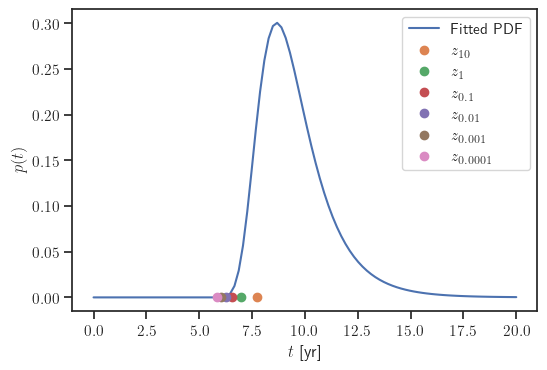

In [9]:
# calculating and displaying 10%, 1%, 0.1%, 0.01%, 0.001%, and 0.0001% quantiles
# labeling notation: 6 digits in the format of 00.0000
z_100000 = T.ppf(10.0000/100) # 10 in 100
z_010000 = T.ppf(01.0000/100) # 1 in 100
z_001000 = T.ppf(00.1000/100) # 1 in 1000
z_000100 = T.ppf(00.0100/100) # 1 in 10000
z_000010 = T.ppf(00.0010/100) # 1 in 100000
z_000001 = T.ppf(00.0001/100) # 1 in 1000000
print(f"10% quantile of T = {z_100000:.2f}" + " years")
print(f"1.0% quantile of T = {z_010000:.2f}" + " years")
print(f"0.1% quantile of T = {z_001000:.2f}" + " years")
print(f"0.01% quantile of T = {z_000100:.2f}" + " years")
print(f"0.001% quantile of T = {z_000010:.2f}" + " years")
print(f"0.0001% quantile of T = {z_000001:.2f}" + " years")

# plotting fitted PDF and different quantiles
fig, ax = plt.subplots()
ax.plot(
    ts,
    T.pdf(ts),
    label="Fitted PDF"
)
ax.plot(z_100000, [0.0], "o", label="$z_{10}$")
ax.plot(z_010000, [0.0], "o", label="$z_{1}$")
ax.plot(z_001000, [0.0], "o", label="$z_{0.1}$")
ax.plot(z_000100, [0.0], "o", label="$z_{0.01}$")
ax.plot(z_000010, [0.0], "o", label="$z_{0.001}$")
ax.plot(z_000001, [0.0], "o", label="$z_{0.0001}$")
ax.set_xlabel(r"$t$ [yr]")
ax.set_ylabel(r"$p(t)$")
plt.legend(loc="best");

print(f"Based on the explanation above, the warranty offered will be: {z_000100:.2f} years")

## Problem 2 - Joint probability mass function of two discrete random variables

Consider two random variables $X$ and $Y$.
$X$ takes values $\{0,1,\dots,4\}$ and $Y$ takes values $\{0,1,\dots,8\}$.
Their joint probability mass function, can be described using a matrix:

In [10]:
P = np.array(
    [
        [0.03607908, 0.03760034, 0.00503184, 0.0205082 , 0.01051408,
         0.03776221, 0.00131325, 0.03760817, 0.01770659],
        [0.03750162, 0.04317351, 0.03869997, 0.03069872, 0.02176718,
         0.04778769, 0.01021053, 0.00324185, 0.02475319],
        [0.03770951, 0.01053285, 0.01227089, 0.0339596 , 0.02296711,
         0.02187814, 0.01925662, 0.0196836 , 0.01996279],
        [0.02845139, 0.01209429, 0.02450163, 0.00874645, 0.03612603,
         0.02352593, 0.00300314, 0.00103487, 0.04071951],
        [0.00940187, 0.04633153, 0.01094094, 0.00172007, 0.00092633,
         0.02032679, 0.02536328, 0.03552956, 0.01107725]
    ]
)

The rows of the matrix correspond to the values of $X$ and the columns to the values of $Y$.
So, if you wanted to find the probability of $p(X=2, Y=3)$ you would do:

In [11]:
print(f"p(X=2, Y=3) = {P[2, 3]:.3f}")

p(X=2, Y=3) = 0.034


A. Verify that all the elements of $P$ sum to one, i.e., that $\sum_{x,y}p(X=x, Y=y) = 1$.

In [12]:
totalProb = np.sum(P)
print(f"Sum of pmf = {totalProb:.5f}")

Sum of pmf = 1.00000


B. Find the marginal probability density of $X$:

$$
p(x) = \sum_{y}p(x,y).
$$

You can represent this as a 5-dimensional vector.

In [13]:
p_x = np.sum(P, axis=1)
print(f"p(x) = {p_x}")

p(x) = [0.20412 0.25783 0.19822 0.1782  0.16162]


C. Find the marginal probability density of $Y$. This is a 9-dimensional vector.

$$
p(y) = \sum_{x}p(x,y).
$$

In [14]:
p_y = np.sum(P, axis=0)
print(f"p(y) = {p_y}")

p(y) = [0.14914 0.14973 0.09145 0.09563 0.0923  0.15128 0.05915 0.0971  0.11422]


D. Find the expectation and variance of $X$ and $Y$.

In [15]:
# defining arrays for the values that X and Y take, respectively
numXVals = 5
numYVals = 9
xs = np.linspace(0, 4, numXVals)
ys = np.linspace(0, 8, numYVals)
# calculating the expectation of X
E_X = np.sum(xs * p_x)
print(f"E[X] = {E_X:.2f}")
# calculating the variance of X
E_X2 = np.sum(xs ** 2 * p_x)
V_X = E_X2 - E_X ** 2
print(f"V[X] = {V_X:.2f}")
# calculating the expectation of Y
E_Y = np.sum(ys * p_y)
print(f"E[Y] = {E_Y:.2f}")
# calculating the variance of Y
E_Y2 = np.sum(ys ** 2 * p_y)
V_Y = E_Y2 - E_Y ** 2
print(f"V[Y] = {V_Y:.2f}")

E[X] = 1.84
V[X] = 1.87
E[Y] = 3.69
V[Y] = 7.19


E. Find the expectation of $\mathbb{E}[X + Y]$.

$$
\mathbb{E}[X + Y] = \mathbb{E}[X] + \mathbb{E}[Y]
$$

In [16]:
E_XpY = E_X + E_Y
print(f"E[X + Y] = {E_XpY:.2f}")

E[X + Y] = 5.53


F. Find the covariance of $X$ and $Y$. Are the two variable correlated? If yes, are they positively or negatively correlated?

$$
\mathbb{C}[X,Y] = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])]
$$

$$
 = \sum_{x,y} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])p(x,y)
$$

In [17]:
C_XY = 0.0
for x in range(numXVals):
    for y in range(numYVals):
        C_XY += (x - E_X) * (y - E_Y) * P[x, y]
print(f"C[X, Y] = {C_XY:.2f}")
print("Yes, the random variables are correlated and their correlation is positive.")

C[X, Y] = 0.32
Yes, the random variables are correlated and their correlation is positive.


G. Find the variance of $X + Y$.

$$
\mathbb{V}[X + Y] = \mathbb{V}[X] + \mathbb{V}[Y] + 2\mathbb{C}[X,Y]
$$

In [18]:
V_XpY = V_X + V_Y + 2*C_XY
print(f"V[X + Y] = {V_XpY:.2f}")

V[X + Y] = 9.70


J. Find the probability that $X+Y$ is less than or equal to 5.
That is, find $p(X + Y \le 5)$.
Hint: Use two for loops to go over all the combinations of $X$ and $Y$ values, check if $X+Y\le 5$, and sum up the probabilities.

In [19]:
probsum = 0.
for x in range(numXVals):
    for y in range(numYVals):
        if x + y <= 5:
            probsum += P[x, y]
            
print(f"p(X + Y <= 5) = {probsum:.2f}")

p(X + Y <= 5) = 0.53


## Problem 3 - Creating a stochastic model for the magnetic properties of steel

The magnetic properties of steel are captured in the so called [$B-H$ curve](https://en.wikipedia.org/wiki/Saturation_(magnetic)) which connects the magnetic field $H$ to the magnetic flux density $B$.
The shape of this curve depends on the manufacturing process of the steel. As a result the $B-H$ differs across different suppliers but also across time for the same supplier.

Let's use some real manufacturer data to visualize these differences.
The data are [here](https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/homework/B_data.csv).
It will take a while to explain how to upload data on Google Colab.
We will do it in the next homework set.
For now, you should just know that the data file ``B_data.csv`` needs to be in the same working directory as this Jupyter notebook.
I have written a bit of code that allows you to put the data file in the right place without too much trouble.
Simply run the following:

In [20]:
url = "https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/lecturebook/data/B_data.csv"
download(url)

If everything worked well, then the following will work:

In [21]:
B_data = np.loadtxt('B_data.csv')
print("B_data = ")
print(B_data)

B_data = 
[[0.      0.00491 0.01913 ... 1.79321 1.79338 1.79354]
 [0.      0.0036  0.01427 ... 1.8368  1.83698 1.83715]
 [0.      0.00365 0.01433 ... 1.77555 1.7757  1.77586]
 ...
 [0.      0.00289 0.01154 ... 1.76683 1.76698 1.76712]
 [0.      0.0081  0.03109 ... 1.7774  1.77756 1.77772]
 [0.      0.0035  0.01392 ... 1.7646  1.76474 1.76489]]


The shape of this dataset is:

In [22]:
print("Shape of B_data: ", B_data.shape)

Shape of B_data:  (200, 1500)


The rows (200) corresponds to different samples of the $B-H$ curves (different suppliers and different times).
The columns (1500) corresponds to different values of $H$.
That is, the $i, j$ element is the value of $B$ at the a specific value of $H$, say $H_j$. The values of $H$ are the equidistant and identical and we are going to ignore them in this analysis.
Let's visualize some of the samples.

Here is one sample:

Text(0.5, 1.0, 'First Sample from B-H Data Set')

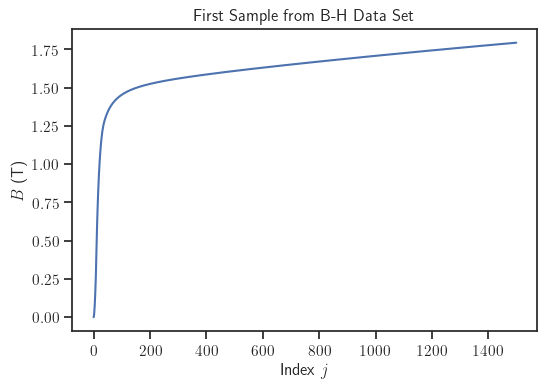

In [23]:
fig, ax = plt.subplots()
ax.plot(B_data[0, :])
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)");
ax.set_title("First Sample from B-H Data Set")

Here are five samples:

Text(0.5, 1.0, 'First 5 Samples from B-H Data Set')

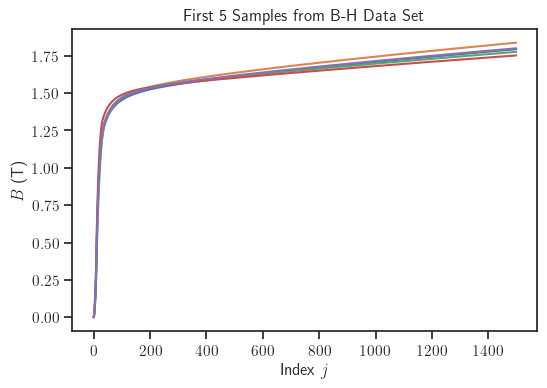

In [24]:
fig, ax = plt.subplots()
ax.plot(B_data[:5, :].T)
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)");
ax.set_title("First 5 Samples from B-H Data Set")

Here are all the samples:

Text(0.5, 1.0, 'All Samples from B-H Data Set')

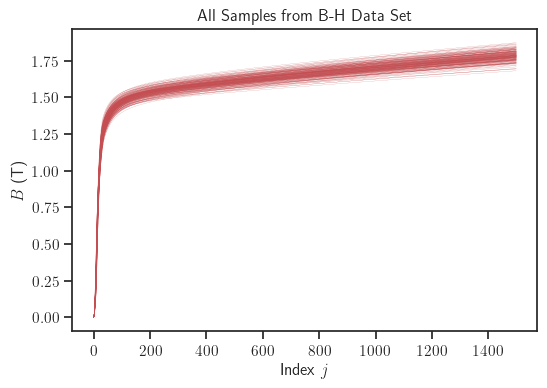

In [25]:
fig, ax = plt.subplots()
ax.plot(B_data[:, :].T, 'r', lw=0.1)
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)");
ax.set_title("All Samples from B-H Data Set")

A. We are going to start by studying the data at only one index. Say index $j=500$.
Let's define a random variable

$$
X = B(H_{500}),
$$

for this reason. Extract and do a histogram of the data for $X$:

Text(0.5, 1.0, 'Histogram of $X = B(H_{500})$')

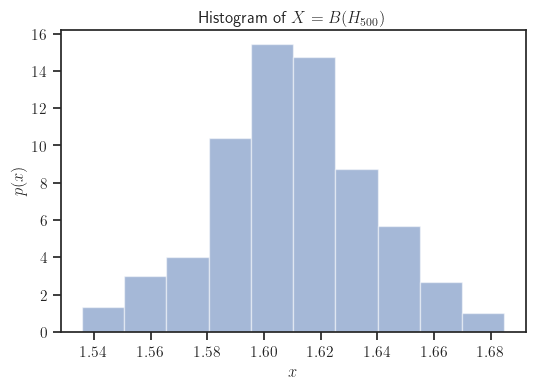

In [26]:
X_data = B_data[:, 500]
fig, ax = plt.subplots()
ax.hist(X_data, alpha=0.5, density=True)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$p(x)$");
ax.set_title("Histogram of $X = B(H_{500})$")

This looks like a Gaussian $N(\mu_{500}, \sigma_{500}^2)$. Let's try to find a mean and variance for that Gaussian.
A good choice for the mean is the empirical average of the data:

$$
\mu_j = \frac{1}{N}\sum_{i=1}^NB_{ij}.
$$

Later we will learn that this is what the *maximum likelihood method* gives us.

So, the mean is:

In [27]:
mu_500 = X_data.mean()
print(f"mu_500 = {mu_500:.2f}")

mu_500 = 1.61


Similarly, for the variance a good choice is the empirical variance defined by:

$$
\sigma_j^2 = \frac{1}{N}\sum_{i=1}^N(B_{ij} - \mu_j)^2.
$$

That is:

In [28]:
sigma2_500 = np.var(X_data)
print(f"sigma_500 = {sigma2_500:.2e}")

sigma_500 = 7.42e-04


Repeat the plot of the histogram of $X$ along with the PDF of the normal variable we have just identified using the functionality of ``scipy.stats``.

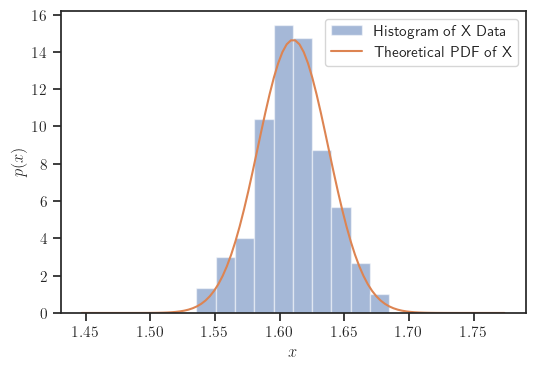

In [29]:
# calculating empirical standard deviation from empirical variance
sigma_500 = np.sqrt(sigma2_500)
# determining new random variable with previously calculated empirical average and standard deviation
X = st.norm(mu_500, sigma_500)
# x values to plot against (choosing a 12-sigma interval about the mean)
xs = np.linspace(mu_500 - 6.0 * sigma_500, mu_500 + 6.0 * sigma_500, 100)
# plotting
fig, ax = plt.subplots()
ax.hist(X_data, alpha=0.5, density=True, label='Histogram of X Data')
ax.plot(xs, X.pdf(xs), label='Theoretical PDF of X')
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$");
ax.legend(loc='best')

B. Using your normal approximation to the PDF of $X$, find the probability that $X = B(H_{500})$ is geater than 1.66 T.

In [30]:
p_gt1p66T = 1 - X.cdf(1.66)
print(f"p(X > 1.66 T) = {p_gt1p66T:.4f}")

p(X > 1.66 T) = 0.0344


C. Let us now consider another random variable

$$
Y = B(H_{1000}).
$$

Isolate the data for this as well:

In [31]:
Y_data = B_data[:, 1000]

Do the ``scatter`` plot of $X$ and $Y$:

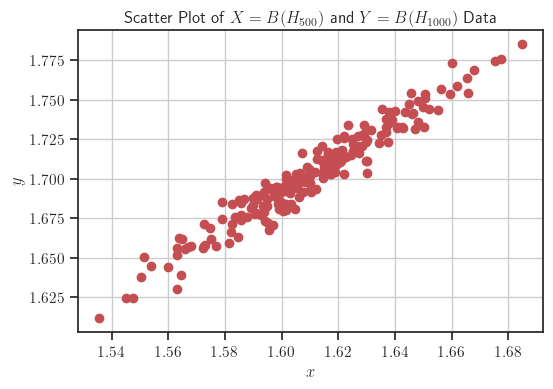

In [32]:
fig, ax = plt.subplots()
ax.scatter(X_data, Y_data, color='r')
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$");
ax.set_title("Scatter Plot of $X = B(H_{500})$ and $Y = B(H_{1000})$ Data")
ax.grid()

D. From the scatter plot, it looks like the random vector

$$
\mathbf{X} = (X, Y),
$$

follows a multivariate normal distribution. What would be the mean and covariance of the distribution.
Well, first organize the samples of $X$ and $Y$ in a matrix with the number of rows being the number of samples and two columns (one corresponding to $X$ and one to $Y$).

In [33]:
XY_data = np.hstack(
    [
        X_data[:, None],
        Y_data[:, None]
    ]
)
print("Shape of XY_data: ", np.shape(XY_data))

Shape of XY_data:  (200, 2)


The mean vector is:

In [34]:
np.set_printoptions(precision=5, suppress=True)
mu_XY = np.mean(XY_data, axis=0)
print(f"mu_XY = {mu_XY}")

mu_XY = [1.61042 1.70264]


The covariance matrix is a little bit trickier. 
We have already discussed how to find the diagonals of the covariance matrix (it is simply the variance).
For the off-diagonal terms, this is the formula that is being used:

$$
C_{jk} = \frac{1}{N}\sum_{i=1}^N(B_{ij} - \mu_j)(B_{ik} - \mu_k).
$$

This is how you can find it:

In [35]:
# Careful with np.cov because it requires you to transpose the matrix
C_XY = np.cov(XY_data.T)
np.set_printoptions(precision=8, suppress=True)
print("C_XY =")
print(C_XY)

C_XY =
[[0.00074572 0.00082435]
 [0.00082435 0.00096729]]


Are the two variables $X$ and $Y$ positively or negatively correlated?<br>
**Answer:**

The two variables $X$ and $Y$ are positively correlated because the off-diagonal terms of the covariance matrix $C_{12} = C_{21}$, which denote the covariance between $X$ and $Y$, are positive.

E. Use ``np.linalg.eigh`` to check that the matrix ``C_XY`` is indeed positive definite.

In [36]:
np.set_printoptions(precision=4, suppress=False)
evals, evects = np.linalg.eigh(C_XY)
print("Eigenvalues of C_XY are = ", evals)
print("Eigenvectors of C_XY are = ")
print(evects)
print("Yes, C_XY is positive definite because all of its eigenvalues are positive.")

Eigenvalues of C_XY are =  [2.4741e-05 1.6883e-03]
Eigenvectors of C_XY are = 
[[-0.7527  0.6583]
 [ 0.6583  0.7527]]
Yes, C_XY is positive definite because all of its eigenvalues are positive.


F. Use the functionality of ``scipy.stats.multivariate_normal`` to plot the joint probability function of the samples of $X$ and $Y$ in the same plot as the scatter plot of $X$ and $Y$.

To avoid notation confusion in the below code, let

$$
\mathbf{Z} =
\left[ {\begin{array}{cc}
  X \\
  Y \\
\end{array} } \right]
$$

be a random vector consisting of $X = B(H_{500})$ and $Y = B(H_{1000})$ as its two elements. This is the same random vector as $\mathbf{X} = (X, Y)$ defined above, it just has a different notation and variable name to avoid ambiguity in the code below.

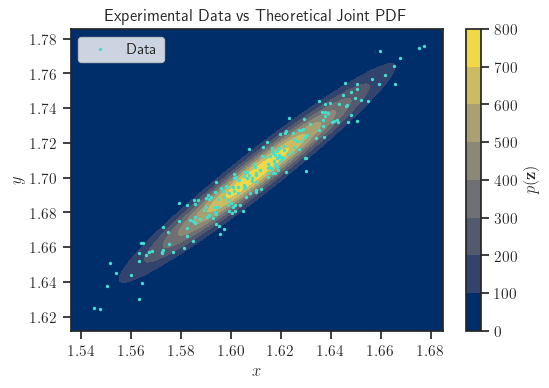

In [37]:
# define multivariate normal object
Z = st.multivariate_normal(mean=mu_XY, cov=C_XY)

# generating pdf from a meshgrid of evenly spaced data points
z1 = np.linspace(X_data.min(), X_data.max(), 250)
z2 = np.linspace(Y_data.min(), Y_data.max(), 250)
Z1, Z2 = np.meshgrid(z1, z2)
Z_flat = np.hstack(
    [
        Z1.flatten()[:, None],
        Z2.flatten()[:, None]
    ]
)
pdf_Z = Z.pdf(Z_flat).reshape(Z1.shape)

fig, ax = plt.subplots()
# plotting the pdf - using contourf rather than contour since samples are easier to visualize
c = ax.contourf(Z1, Z2, pdf_Z, cmap='cividis')
plt.colorbar(c, label='$p(\mathbf{z})$')

# plotting the observed data
ax.scatter(X_data, Y_data, color='turquoise', s=2, label='Data')
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_title("Experimental Data vs Theoretical Joint PDF")
ax.legend(loc='best')

G. Now, let's think each $B-H$ curve as a random vector.
That is, the random vector $\mathbf{B}$ corresponds to the values of the magnetic flux density at a fixed number of $H$-values. It is:

$$
\mathbf{B} = (B(H_1), \dots, B(H_{1500})).
$$

It is like $\mathbf{X} = (X, Y)$ only now we have 1500 dimensions instead of $2$.

First, let's find the mean of this random vector:

In [38]:
B_mu = np.mean(B_data, axis=0)
print("B_mu = ", B_mu)
print("Shape of B_mu: ", np.shape(B_mu))

B_mu =  [0.     0.0039 0.0152 ... 1.7837 1.7839 1.784 ]
Shape of B_mu:  (1500,)


Let's plot the mean on top of all the data we have:

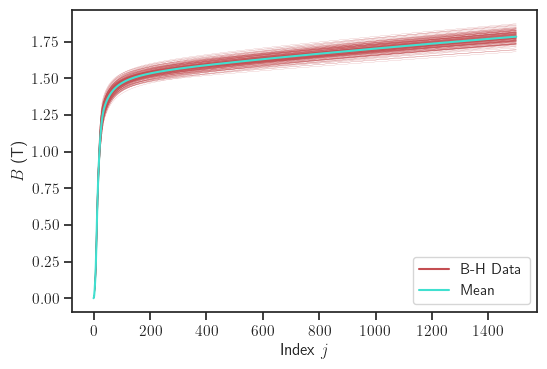

In [39]:
fig, ax = plt.subplots()
ax.plot(B_data[:, :].T, 'r', lw=0.1)
plt.plot([],[], 'r', label='B-H Data')
ax.plot(B_mu, color='turquoise', label="Mean")
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)")
plt.legend(loc="best");

It looks good. Now, find the covariance matrix of $\mathbf{B}$. This is going to be a 1500x1500 matrix.

In [40]:
B_cov = np.cov(B_data.T)
print("B_cov = ", B_cov)
print("Shape of B_cov: ", np.shape(B_cov))

B_cov =  [[0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 1.1628e-06 4.4198e-06 ... 3.1823e-06 3.1839e-06 3.1855e-06]
 [0.0000e+00 4.4198e-06 1.6804e-05 ... 1.2283e-05 1.2289e-05 1.2295e-05]
 ...
 [0.0000e+00 3.1823e-06 1.2283e-05 ... 1.2027e-03 1.2029e-03 1.2032e-03]
 [0.0000e+00 3.1839e-06 1.2289e-05 ... 1.2029e-03 1.2032e-03 1.2034e-03]
 [0.0000e+00 3.1855e-06 1.2295e-05 ... 1.2032e-03 1.2034e-03 1.2037e-03]]
Shape of B_cov:  (1500, 1500)


Let's plot this matrix:

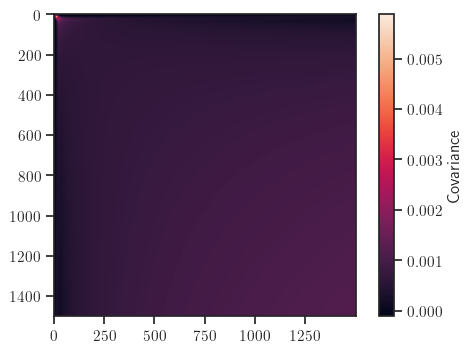

In [41]:
fig, ax = plt.subplots()
c = ax.imshow(B_cov, interpolation='nearest')
plt.colorbar(c, label="Covariance");

The numbers are very small.
This is because the covariance depends on the scale of $X$ and $Y$.
If we change the units it will change.
To get a more objective measure, we should be using the [correlation](https://en.wikipedia.org/wiki/Correlation).
The correlation is essentially the covariance of $X$ and $Y$ scaled by their standard deviation, i.e.:

$$
\rho(X, Y) = \frac{\mathbb{C}[X, Y]}{\sqrt{\mathbb{V}[X]\mathbb{V}[Y]}}.
$$

Obviously the correlation has the same sign as the covariance.
The addendum is that it is unitless and unambiguously scaled between -1 and +1.
Here is how you can find it:

In [42]:
# Note that I have to remove the first point because it is always zero
# and it has zero variance. --> X_1 = B(H_0) = 0 with probability of 1...
B_corr = np.corrcoef(B_data[:,1:].T)
print("B_corr = ")
print(B_corr)
print("Shape of B_corr: ", np.shape(B_corr))

B_corr = 
[[1.     0.9999 0.9994 ... 0.0851 0.0851 0.0851]
 [0.9999 1.     0.9998 ... 0.0864 0.0864 0.0865]
 [0.9994 0.9998 1.     ... 0.0878 0.0878 0.0879]
 ...
 [0.0851 0.0864 0.0878 ... 1.     1.     1.    ]
 [0.0851 0.0864 0.0878 ... 1.     1.     1.    ]
 [0.0851 0.0865 0.0879 ... 1.     1.     1.    ]]
Shape of B_corr:  (1499, 1499)


Here is the correlation visualized:

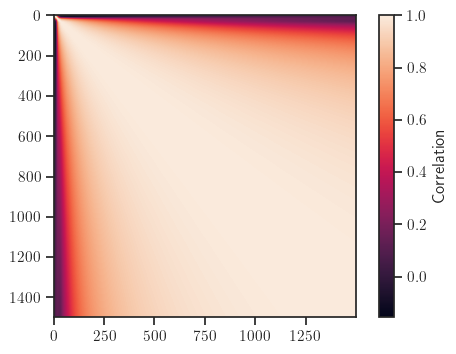

In [43]:
fig, ax = plt.subplots()
c = ax.imshow(B_corr, interpolation='nearest')
plt.colorbar(c, label="Correlation");
# self note: correlation increases for rv's corresponding to higher H values
# https://en.wikipedia.org/wiki/Covariance_matrix

You see that the values are quite a bit correlated. This makes sense because the curves are all very smooth and they look very much alike. 

Let's check if the covariance is indeed positive definite:

In [44]:
np.set_printoptions(precision=4, suppress=False)
print("Eigenvalues of B_cov = ")
evals = np.linalg.eigh(B_cov)[0]
print(evals)
print("Number of eigenvalues: ", len(evals))

Eigenvalues of B_cov = 
[-2.4602e-16 -2.3757e-16 -1.6271e-16 ...  4.6624e-02  1.1664e-01
  1.2073e+00]
Number of eigenvalues:  1500


Hmm, notice that there are several eigenvalues that are negative, but they are too small. Very close to zero. This happens very often in practice when you are finding the covariance of a very large random vectors. It arises from the fact that we are using floating point arithmetic instead of a real numbers. It is a numerical artifact.
If you tried to use this covariance to make a multivariate normal random vector using ``scipy.stats`` it would fail.
Try this:

In [45]:
B = st.multivariate_normal(mean=B_mu, cov=B_cov)

LinAlgError: singular matrix

The way to overcome this problem is to add a small positive number to the diagonal. This needs to be very small so that the distribution does not change very much. It must be the smallest possible number that makes the covariance matrix behave well. This is known as the *jitter* or the *nugget*. Find the nugget playing with the code below. Every time you try, multiply the nugget by ten.

In [46]:
# Pick the nugget here
nugget = 1e-9
# This is the modified covariance matrix
B_cov_w_nugget = B_cov + nugget * np.eye(B_cov.shape[0])
# Try building the distribution:
try:
    B = st.multivariate_normal(mean=B_mu, cov=B_cov_w_nugget)
    print('It worked! Move on.')
except:
    print('It did not work. Increase nugget by 10.')

It worked! Move on.


H. Now you have created your first stochastic model of a complicated physical quantity. By sampling from your newly constructed random vector $\mathbf{B}$ you have essentially quantified your uncertainty about the $B-H$ curve as induced by the inability to perfectly control the production of steel. Take 10 samples of this random vector and plot them.

Shape of random sample data:  (10, 1500)


Text(0.5, 1.0, 'Ten Samples from $\\mathbf{B}$')

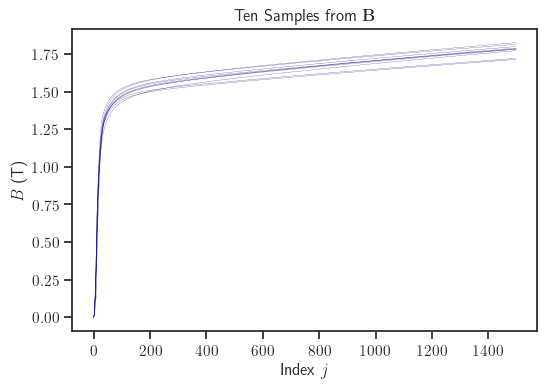

In [47]:
# take 10 random samples of the multivariate normal created above
randomBSamples = B.rvs(size=10)
# verifying that each sample is a vector of the correct length
print("Shape of random sample data: ", np.shape(randomBSamples))
# plotting the result
fig, ax = plt.subplots()
ax.plot(randomBSamples[:, :].T, color='navy', lw=0.15)
ax.set_xlabel(r"Index $j$")
ax.set_ylabel(r"$B$ (T)");
ax.set_title(r"Ten Samples from $\mathbf{B}$")

Congratulations!
You have made your first stochastic model of a physical field quantity.
You have now the ability to sample $B-H$ curves in a way that honors the manufacturing uncertainties.
This is the first step to uncertainty quantification studies.
The next step would be to propagate these samples through Maxwell's equations to characterize the effect on performance of an electric machine.
If you are interested to see how that looks take a look at {cite}`sahu2020` and {cite}`beltran2020`.